Accuracy: 0.9161290322580645
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.95      0.96       128
           2       0.36      0.50      0.42         8
           3       1.00      0.67      0.80         3
           4       0.67      0.67      0.67         3
           5       1.00      0.92      0.96        13

    accuracy                           0.92       155
   macro avg       0.80      0.74      0.76       155
weighted avg       0.93      0.92      0.92       155



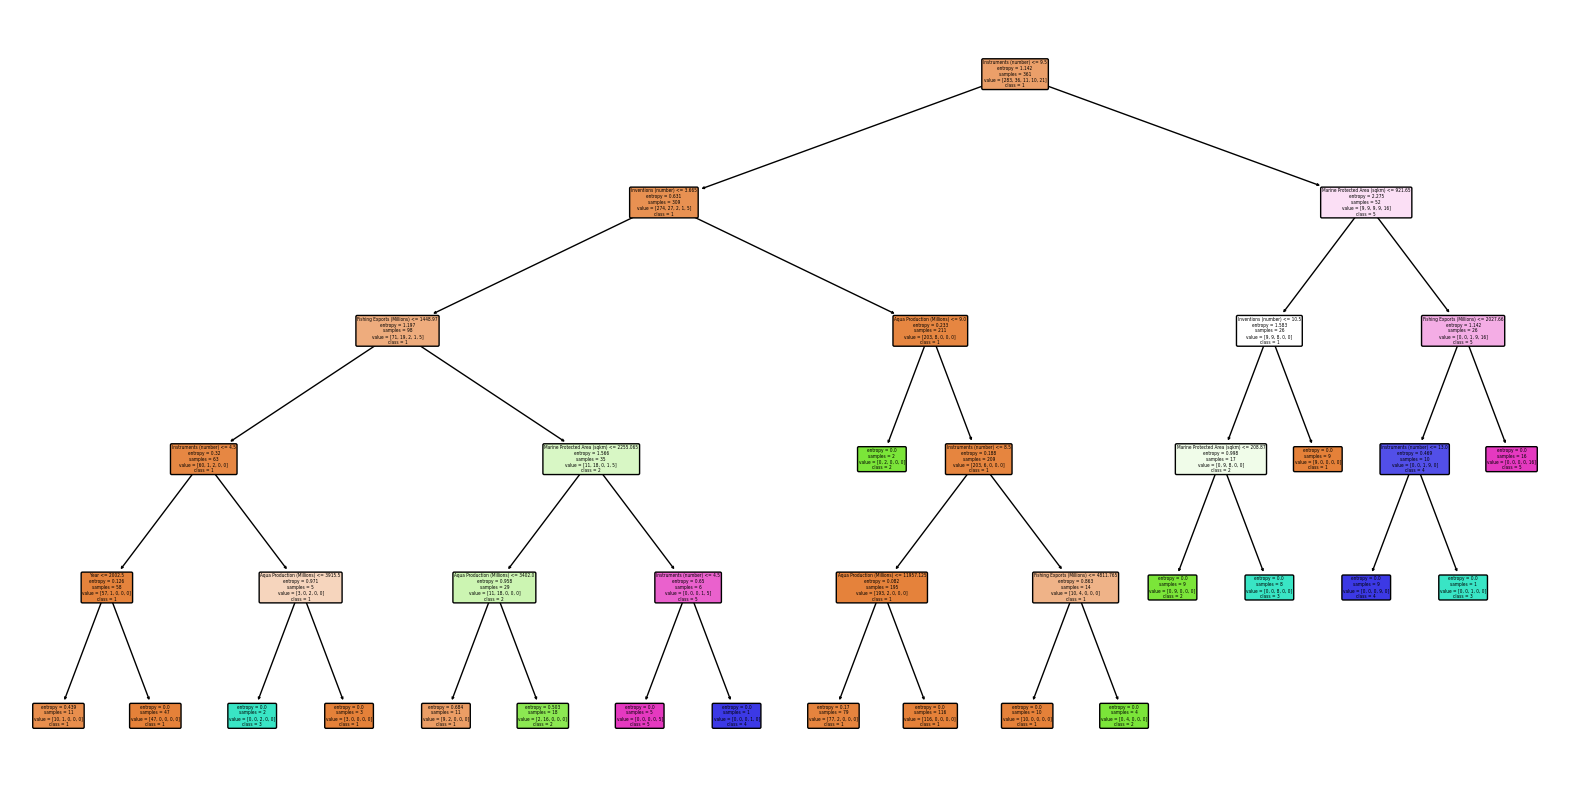

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
trees = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")

# Encode 'Country' using label encoding
label_encoder = LabelEncoder()
trees['Country'] = label_encoder.fit_transform(trees['Country'])

# Create bins and encode 'Value' into 1, 2, 3, 4, 5
y = trees['Value']
bin_edges = [0, 18, 36, 54, 72, 87]
y_binned = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)

# Add a new column 'Binned_Value' to the DataFrame
trees['Binned_Value'] = y_binned + 1

# X is all features besides 'Value' and 'Country'
X = trees.drop(['Value', 'Binned_Value', 'Country'], axis=1)

# Target variable
y = trees['Binned_Value']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=[str(label) for label in sorted(y.unique())], filled=True, rounded=True)
plt.show()


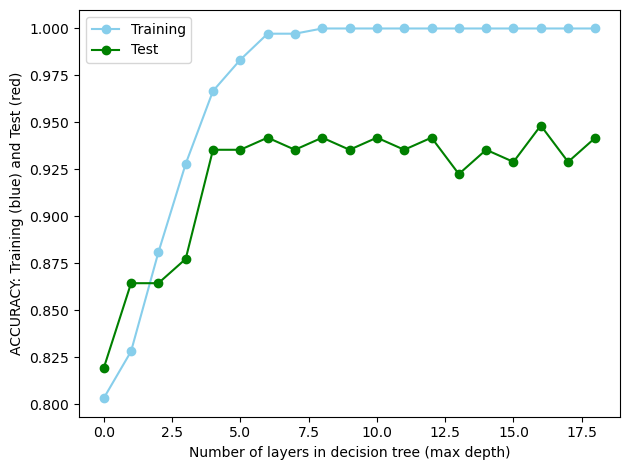

In [39]:
test_results = []
train_results = []

for num_layer in range(1, 20):
    model = DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train, y_train)

    yp_train = model.predict(X_train)
    yp_test = model.predict(X_test)

    test_results.append([num_layer, accuracy_score(y_test, yp_test), recall_score(y_test, yp_test, average='weighted')])
    train_results.append([num_layer, accuracy_score(y_train, yp_train), recall_score(y_train, yp_train, average='weighted')])

plt.plot([column[1] for column in train_results], marker='o', color="skyblue", label="Training")
plt.plot([column[1] for column in test_results], marker='o', color="green", label="Test")
plt.ylabel("ACCURACY: Training (blue) and Test (red)")
plt.xlabel("Number of layers in decision tree (max depth)")
plt.legend()
plt.tight_layout()
plt.show()



ACCURACY: 0.9354838709677419
NEGATIVE RECALL (Y=0): 0.9765625
NEGATIVE PRECISION (Y=0): 0.9615384615384616
POSITIVE RECALL (Y=1): 0.5
POSITIVE PRECISION (Y=1): 0.5
[[125   3   0   0   0]
 [  3   4   0   1   0]
 [  0   1   2   0   0]
 [  1   0   0   2   0]
 [  1   0   0   0  12]]


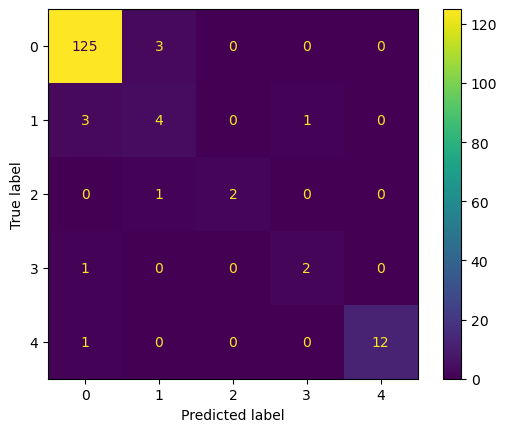

In [41]:
def confusion_plot(y_data, y_pred):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.metrics import accuracy_score, recall_score, precision_score

    accuracy = accuracy_score(y_data, y_pred)
    
    # Assuming Y=0 is the negative class and Y=1 is the positive class
    n_recall = recall_score(y_data, y_pred, average=None)[0]
    n_precision = precision_score(y_data, y_pred, average=None)[0]
    p_recall = recall_score(y_data, y_pred, average=None)[1]
    p_precision = precision_score(y_data, y_pred, average=None)[1]
    
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    print("ACCURACY:", accuracy)
    print("NEGATIVE RECALL (Y=0):", n_recall)
    print("NEGATIVE PRECISION (Y=0):", n_precision)
    print("POSITIVE RECALL (Y=1):", p_recall)
    print("POSITIVE PRECISION (Y=1):", p_precision)
    print(cm)
    
    disp.plot()
    plt.show()


ACCURACY: 0.9419354838709677
NEGATIVE RECALL (Y=0): 0.96875
NEGATIVE PRECISION (Y=0): 0.9841269841269841
POSITIVE RECALL (Y=1): 0.75
POSITIVE PRECISION (Y=1): 0.5454545454545454
[[124   4   0   0   0]
 [  2   6   0   0   0]
 [  0   1   2   0   0]
 [  0   0   0   2   1]
 [  0   0   0   1  12]]


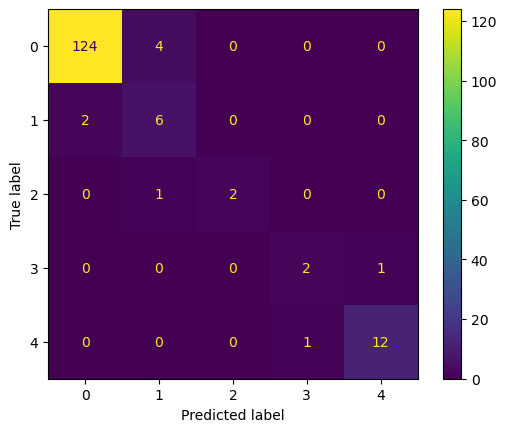

In [44]:
confusion_plot(y_test,yp_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=1)

# Train Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Predict the response for test dataset
y_rf_pred = rf_classifier.predict(X_test)

# Model Accuracy
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Classification Report for Random Forest
rf_classification_rep = classification_report(y_test, y_rf_pred)
print("Random Forest Classification Report:\n", rf_classification_rep)


Random Forest Accuracy: 0.967741935483871
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       128
           2       0.83      0.62      0.71         8
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       0.93      1.00      0.96        13

    accuracy                           0.97       155
   macro avg       0.95      0.79      0.85       155
weighted avg       0.97      0.97      0.96       155



In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
from sklearn.exceptions import FitFailedWarning

# ...

# Suppress FitFailedWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)

# Load the dataset
trees = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")

# Encode 'Country' using label encoding
label_encoder = LabelEncoder()
trees['Country'] = label_encoder.fit_transform(trees['Country'])

# Create bins and encode 'Value' into 1, 2, 3, 4, 5
y = trees['Value']
bin_edges = [0, 18, 36, 54, 72, 87]
y_binned = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)

# Add a new column 'Binned_Value' to the DataFrame
trees['Binned_Value'] = y_binned + 1

# X is all features besides 'Value' and 'Country'
X = trees.drop(['Value', 'Binned_Value', 'Country'], axis=1)

# Target variable
y = trees['Value']  # Use 'Value' instead of 'Binned_Value' for regression

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree regressor object
regressor = DecisionTreeRegressor()

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)

# Model Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Test Set:", mse)


Best Hyperparameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error (MSE) on Test Set: 66.58834387529679


/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
97 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_

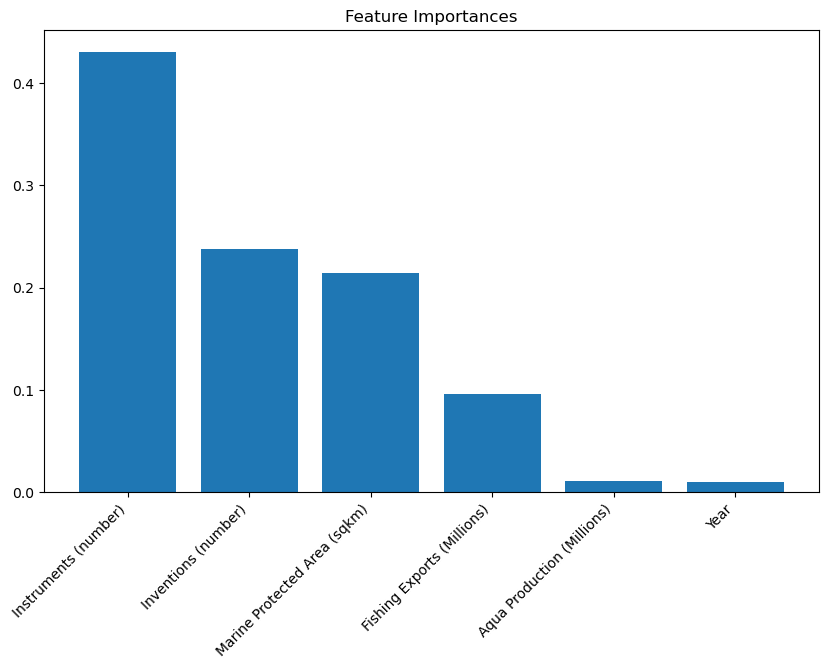

In [59]:

# Create Decision Tree regressor object
regressor = DecisionTreeRegressor()

# Train Decision Tree Regressor
regressor.fit(X, y)

# Get feature importances
feature_importances = regressor.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances')
plt.show()


Mean Squared Error (MSE) on Test Set: 58.84053726599997


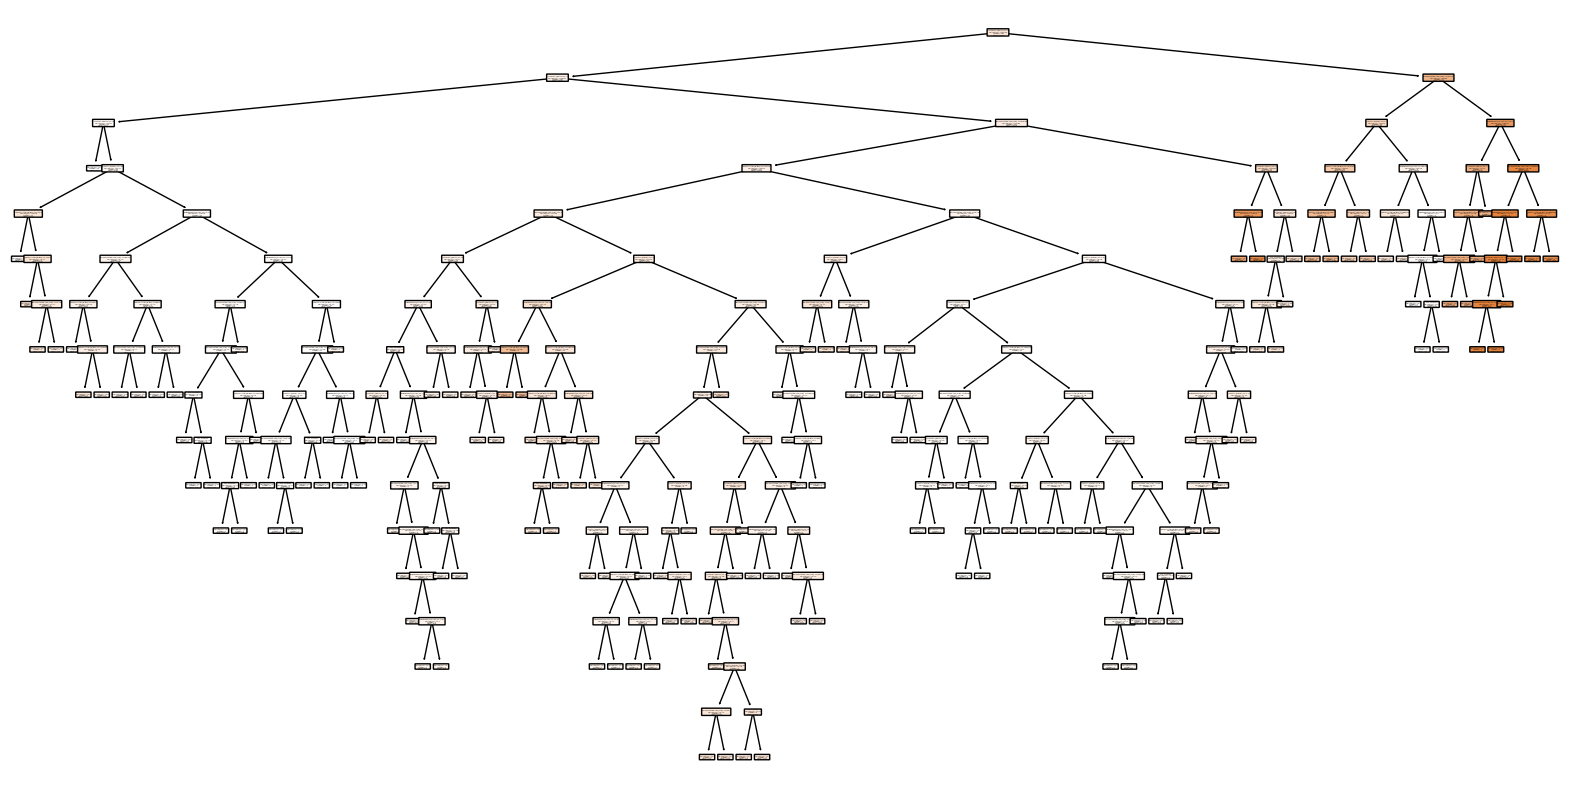

In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Suppress FitFailedWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)

# Load the dataset
trees = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")

# Encode 'Country' using label encoding
label_encoder = LabelEncoder()
trees['Country'] = label_encoder.fit_transform(trees['Country'])

# Create bins and encode 'Value' into 1, 2, 3, 4, 5
y = trees['Value']
bin_edges = [0, 18, 36, 54, 72, 87]
y_binned = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)

# Add a new column 'Binned_Value' to the DataFrame
trees['Binned_Value'] = y_binned + 1

# X is all features besides 'Value' and 'Country'
X = trees.drop(['Value', 'Binned_Value', 'Country'], axis=1)

# Target variable
y = trees['Value']  # Use 'Value' instead of 'Binned_Value' for regression

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Random Forest regressor object
regressor = RandomForestRegressor()

# Train Random Forest Regressor
regressor.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = regressor.predict(X_test)

# Model Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Test Set:", mse)

# Visualize one of the decision trees in the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(regressor.estimators_[0], feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()
